In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [2]:
y = pd.read_csv("AAPL_quarterly_financials.csv")

In [3]:
y.index = y.name

In [4]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [5]:
y.index = pd.to_datetime(y.index)

In [6]:
# CHECK IF NAS ARE NO DIVIDEND PERIOD
y = y.sort_index().fillna(0.)

# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [7]:
from pytrends.request import TrendReq

In [8]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["Discount", "Technology", "Apple Stock", "Apple Fan", "Phone Reviews", "iPhone Expensive", "iPhone Tech", "NBA Match", "DMV", "Donald Trump"]  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [9]:
X = df = df.resample("Q").mean()

In [10]:
# ALIGN DATA
temp = pd.concat([y, X],axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

In [11]:
X

,Discount,Technology,Apple Stock,Apple Fan,Phone Reviews,iPhone Expensive,iPhone Tech,NBA Match,DMV,Donald Trump
2004-03-31,90.666667,96.666667,1.666667,52.333333,86.333333,0.000000,0.000000,5.333333,75.666667,2.333333
2004-06-30,91.333333,91.333333,1.000000,40.333333,83.666667,2.333333,1.000000,8.666667,86.333333,2.000000
2004-09-30,91.000000,84.000000,1.333333,59.000000,95.333333,2.333333,0.000000,3.666667,94.666667,1.333333
2004-12-31,87.666667,78.666667,2.666667,42.333333,92.333333,3.000000,2.000000,11.333333,67.666667,2.000000
2005-03-31,79.666667,78.000000,5.333333,76.333333,83.333333,0.000000,0.000000,10.000000,71.333333,2.000000
...,...,...,...,...,...,...,...,...,...,...
2022-09-30,46.333333,31.000000,29.333333,66.000000,22.333333,55.666667,40.666667,13.666667,44.000000,4.000000
2022-12-31,48.000000,28.666667,27.666667,54.333333,19.333333,49.000000,41.000000,55.333333,36.000000,4.000000
2023-03-31,43.333333,30.333333,32.666667,52.666667,20.000000,47.000000,34.333333,65.333333,40.666667,3.666667
2023-06-30,43.333333,29.000000,28.000000,56.666667,20.333333,47.666667,30.666667,76.000000,41.666667,4.666667


# 3.) Normalize all the X data

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
X_scaled=scaler.fit_transform(X)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [24]:
from sklearn.linear_model import Lasso

In [25]:
lasso=Lasso(alpha=.5)

In [46]:
lasso.fit(X, y)

Lasso(alpha=0.5)

In [47]:
coefficients = lasso.coef_

In [48]:
coefficients

array([ 0.        ,  0.        ,  0.00927675,  0.        , -0.00781184,
        0.        , -0.        ,  0.00571319, -0.0034969 , -0.        ])

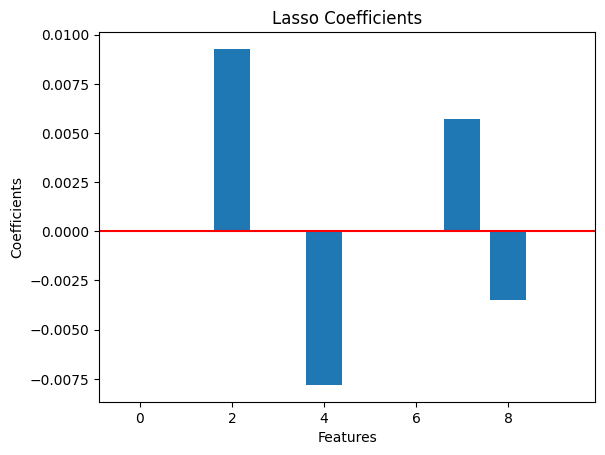

In [51]:
plt.bar(range(X_scaled.shape[1]), coefficients)
plt.axhline(0, color = "red")
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Lasso Coefficients')
plt.show()

# 5.) Do these coefficient magnitudes make sense?